Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import opendatasets as od

importing required dataset

In [ ]:
od.download(r"https://www.kaggle.com/datasets/sumanthnimmagadda/student-spending-dataset?select=student_spending+%281%29.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surisettideepika
Your Kaggle Key: ··········


100%|██████████| 28.5k/28.5k [00:00<00:00, 9.04MB/s]

In [ ]:
student_data = pd.read_csv("/content/student-spending-dataset/student_spending.csv")

Extracting first 5 rows to understand the data

In [ ]:
student_data.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


Observing what are the columns in the dataset.

In [ ]:
student_data.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

In [ ]:
student_data.shape

(1000, 18)

As the Unnamed: 0 is not required we can remove it.

In [ ]:
student_data.drop("Unnamed: 0", axis = 1, inplace = True)

Understang the pivotal features of the dataset through which we can extract meaningful insights from the data.
Here we can see that our data doesn't contain any null values.So there is no need of dealing with null values.

In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

Inorder to make it more memory efficient convert the columns containing object type into category type.

In [ ]:
for col in student_data.columns:
  if student_data[col].dtype=="object":
    student_data[col]=student_data[col].astype('category')
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1000 non-null   int64   
 1   gender                    1000 non-null   category
 2   year_in_school            1000 non-null   category
 3   major                     1000 non-null   category
 4   monthly_income            1000 non-null   int64   
 5   financial_aid             1000 non-null   int64   
 6   tuition                   1000 non-null   int64   
 7   housing                   1000 non-null   int64   
 8   food                      1000 non-null   int64   
 9   transportation            1000 non-null   int64   
 10  books_supplies            1000 non-null   int64   
 11  entertainment             1000 non-null   int64   
 12  personal_care             1000 non-null   int64   
 13  technology                1000 non-null   int64  

Inorder to know more about the data use describe() method.

In [ ]:
student_data.describe()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


As the describe method decribes only numerical data we have to use a parameter in that method "include=object" in order to describe the columns with categorical data.

In [ ]:
student_data.describe(include="object")

,gender,year_in_school,major,preferred_payment_method
count,1000,1000,1000,1000
unique,3,4,5,3
top,Male,Senior,Biology,Mobile Payment App
freq,356,254,228,350


for checking whether dataset consists of any duplicates or not we make use of duplicated() method.
But here we can see that there are no duplicates.

In [ ]:
student_data.duplicated().sum()

0

These are the columns or features or attributes that we have in our data.

In [ ]:
student_data.columns

Index(['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'financial_aid', 'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method'],
      dtype='object')

If the dataset used for analysis contain outliers, it may severly affect the outcome and leads to underperformance. So for this first calculate the 1st and 3rd quartiles to find Interquartile range which will be used to identify if the dataset contains any outliers.

In [ ]:
numeric_columns = ['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
                    'transportation', 'books_supplies', 'entertainment', 'personal_care',
                    'technology', 'health_wellness', 'miscellaneous']

# IQR method
Q1 = student_data[numeric_columns].quantile(0.25)
Q3 = student_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((student_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (student_data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Displaying the outliers
print("\nOutliers (IQR Method):")
print(outliers_iqr.sum())
print("\nNo magical outliers detected! Our data enchantment is working its wonders. 🪄🌟")


Outliers (IQR Method):
age                0
monthly_income     0
financial_aid      0
tuition            0
housing            0
food               0
transportation     0
books_supplies     0
entertainment      0
personal_care      0
technology         0
health_wellness    0
miscellaneous      0
dtype: int64

No magical outliers detected! Our data enchantment is working its wonders. 🪄🌟


Luckily we don't have any outliers.
we can also check for outliers through box plot which inturn is based on IQR.

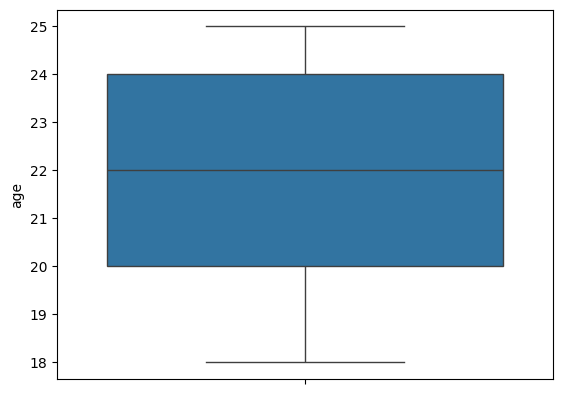

In [ ]:
sns.boxplot(student_data['age'])
plt.show()

Identifying how much money is being spent on entertainment by various age groups.

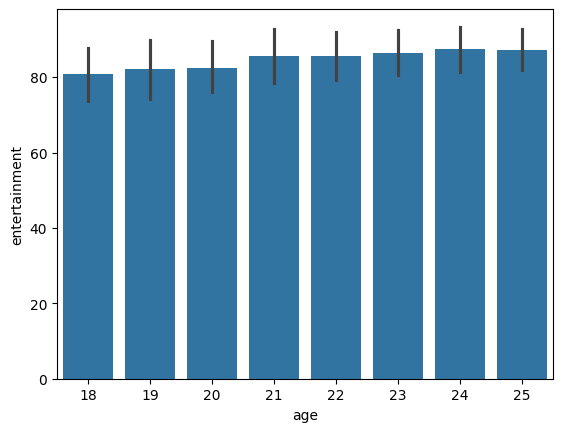

In [ ]:
sns.barplot(x="age", y="entertainment" ,data=student_data)
plt.show()

here we can identify that nearly all age grops are spending equal money on entertainment.But among them students of ages 24 and 25 are spending more than $80 and the students between 18 and 20 are spending less money on entertainment.

The graph reveals how students spending money in entertainment between genders.From the graph below we can see that all sections are spending nearly same ratio of amount.

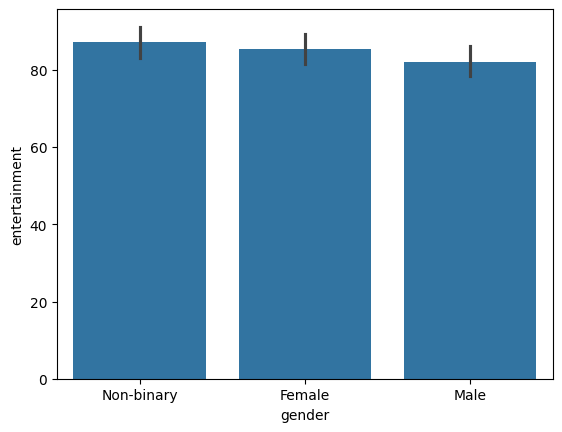

In [ ]:
sns.barplot(x="gender", y="entertainment" ,data=student_data)
plt.show()

The following graph show the distribution of gender in the dataset.We can see that male occupied maximum positions.

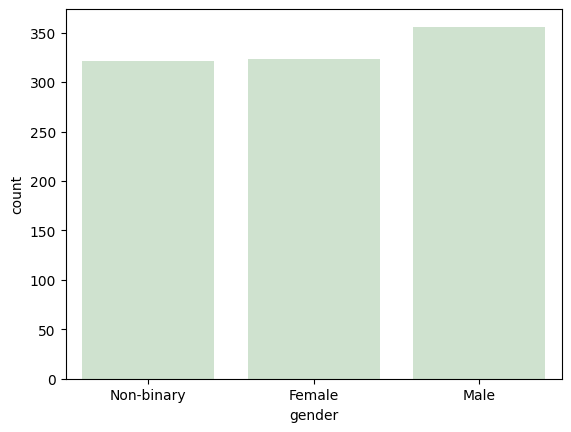

In [ ]:
sns.countplot(x=student_data.gender, color="g",alpha=0.2)
%matplotlib inline
plt.show()

Understanding on average, how much boys and girls spend on different things like tuition, housing, food, and more. This helps us understand if there are any differences in spending habits between boys and girls when it comes to these expenses.

In [ ]:
df = student_data.groupby("gender")[['tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous']].mean()

In [ ]:
df

,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
gender,,,,,,,,,,
Female,4494.210526,689.504644,247.681115,126.040248,178.987616,85.433437,60.993808,172.266254,114.804954,108.671827
Male,4541.362360,707.755618,254.876404,124.471910,171.165730,82.092697,60.207865,179.112360,112.837079,107.030899
Non-binary,4523.489097,689.517134,255.155763,123.408100,174.495327,87.208723,60.947040,183.482866,115.445483,111.233645


we an see that all the three sections of gender are spending in equal ratio. But fascinating thing is they are spending more on education with respect to remaining categoris of entertainment.

showing how tuition fees vary across different student majors, with each bar segmented by the year in school. This visualization can help identify trends or differences in tuition costs among different majors and student academic years.

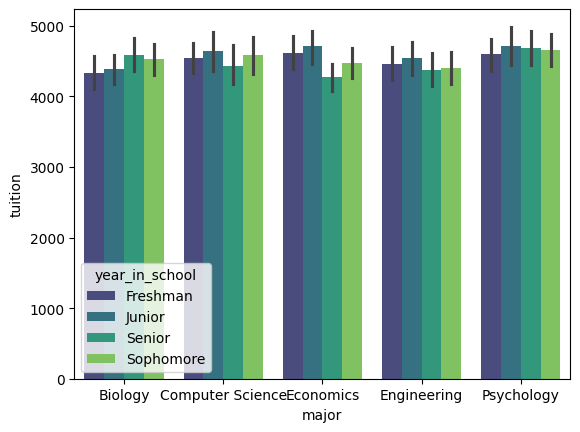

In [ ]:
sns.barplot(x=student_data.major,y=student_data.tuition,hue=student_data.year_in_school,palette="viridis")
plt.show()

showing how income vary across different gender, with each bar segmented by the year in school. This visualization can help identify trends or differences in monthly income among different student academic years.

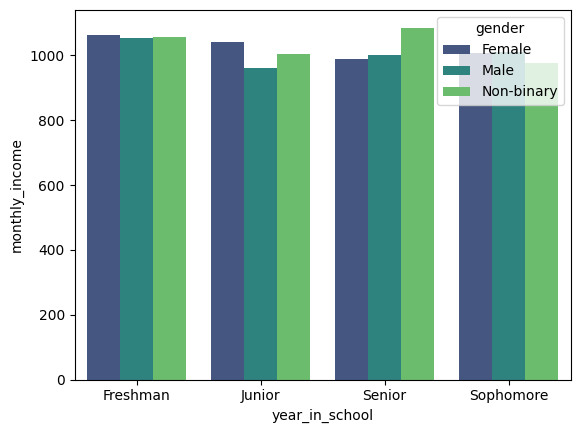

In [ ]:
sns.barplot(x=student_data.year_in_school,y=student_data.monthly_income,hue=student_data.gender,palette="viridis",errorbar=None)
plt.show()

<ipython-input-76-b9ddc576e472>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_in_school",data=student_data,palette='viridis')


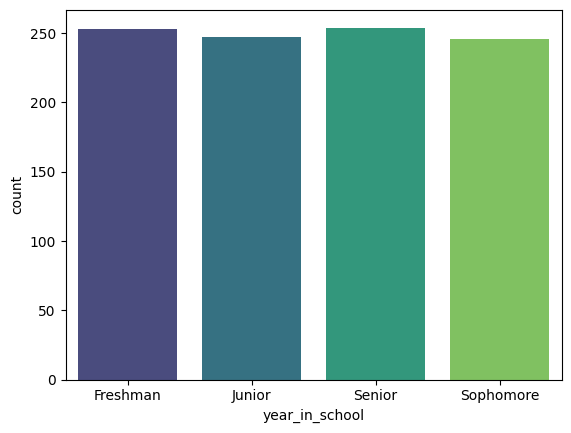

In [ ]:
sns.countplot(x="year_in_school",data=student_data,palette='viridis')
plt.show()

pie chart representing the proportion of each gender category among the students, with each slice of the pie corresponding to a different gender category. The percentage displayed on each slice indicates its relative size compared to the whole.

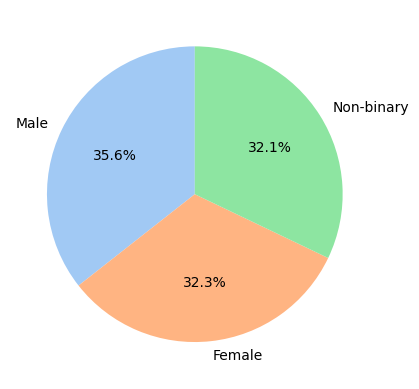

In [ ]:
plt.pie(x=student_data['gender'].value_counts(),labels=student_data.gender.value_counts().index,autopct="%1.1f%%",startangle=90
        ,colors=sns.color_palette('pastel'))
plt.show()

pie chart representing the distribution of students across different years in school, with each slice corresponding to a different year. The percentage displayed on each slice indicates its relative size compared to the total number of students.

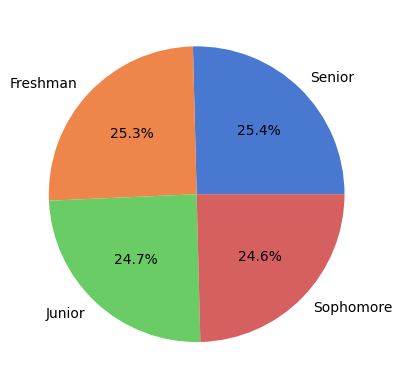

In [ ]:
plt.pie(x=student_data['year_in_school'].value_counts(),labels=student_data.year_in_school.value_counts().index,autopct="%1.1f%%"
,colors=sns.color_palette('muted'))
plt.show()

A grid of histograms, each showing the distribution of spending for a different expense category. The histograms provide insights into the spread and concentration of expenditure within each category.

<Figure size 1000x1000 with 0 Axes>

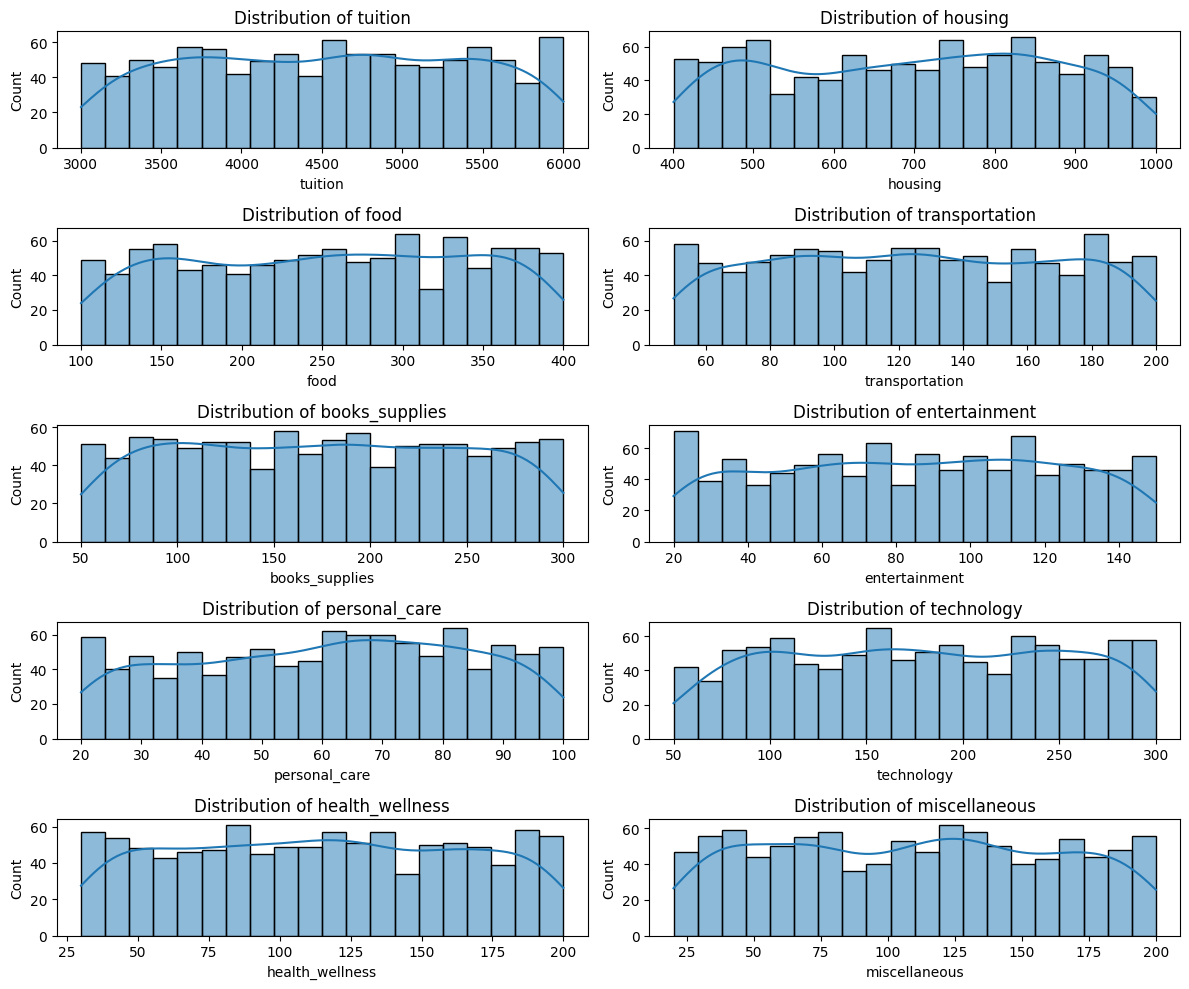

In [ ]:
plt.figure(figsize=(10,10))
columns=['tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous']
fig,axes=plt.subplots(len(columns)//2,2,figsize=(12,10))
axes = axes.flatten()
for i,col in enumerate(columns):
  sns.histplot(student_data[col],bins=20, kde=True,ax=axes[i])
  axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


bar plot where each bar represents the count of students who prefer a particular payment method. This visualization offers insights into the popularity of different payment methods among students.It uncovers the fact that most of the students are preferring online mode of payment and least preference is given to cash payment.

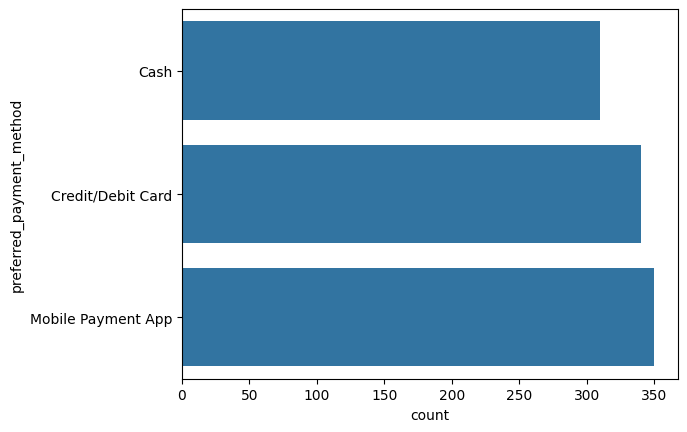

In [ ]:
sns.countplot(student_data.preferred_payment_method)
plt.show()

Encoding categorical columns into numerical values using a label encoder.calculating the correlation matrix of the student data.Generating a heatmap using Seaborn to visualize the correlation matrix.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enc = LabelEncoder()

std_copy=student_data.copy()

In [ ]:
catg_col=['gender', 'year_in_school', 'major', 'preferred_payment_method']

for col in catg_col:
  student_data[col]=label_enc.fit_transform(student_data[col])

In [ ]:
student_data.head()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,19,2,0,4,958,270,5939,709,296,123,188,41,78,134,127,72,1
1,24,0,1,2,1006,875,4908,557,365,85,252,74,92,226,129,68,1
2,24,2,1,2,734,928,3051,666,220,137,99,130,23,239,112,133,0
3,23,0,2,1,617,265,4935,652,289,114,223,99,30,163,105,55,2
4,20,0,2,1,810,522,3887,825,372,168,194,48,71,88,71,104,1


In [ ]:
corr_matrix=student_data.corr()

In [ ]:
corr_matrix

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
age,1.000000,0.028100,0.055227,0.012231,-0.015448,-0.022263,0.037042,0.023288,0.029906,-0.015375,0.025567,0.060446,-0.052414,0.005633,-0.025031,0.003904,-0.022827
gender,0.028100,1.000000,-0.012286,-0.043070,0.008636,-0.018788,0.013690,0.000124,0.034546,-0.024264,-0.024976,0.018671,-0.000849,0.062778,0.005144,0.019573,-0.030592
year_in_school,0.055227,-0.012286,1.000000,-0.004163,-0.058961,-0.019791,-0.006664,-0.069815,0.005258,0.026708,-0.042306,-0.015079,-0.029241,-0.029159,-0.020368,0.059267,-0.043819
major,0.012231,-0.043070,-0.004163,1.000000,0.020778,-0.025996,0.048675,-0.028234,0.022010,-0.000370,-0.022125,-0.006878,0.052500,-0.022193,-0.048591,-0.022861,0.017775
monthly_income,-0.015448,0.008636,-0.058961,0.020778,1.000000,0.037050,-0.000149,0.004471,-0.018521,0.046152,0.003527,0.024454,0.006842,0.010084,-0.032567,-0.023902,-0.009190
financial_aid,-0.022263,-0.018788,-0.019791,-0.025996,0.037050,1.000000,0.008536,-0.008199,0.017463,0.017674,-0.048570,0.014249,-0.010427,0.017912,0.024430,-0.002977,0.037379
tuition,0.037042,0.013690,-0.006664,0.048675,-0.000149,0.008536,1.000000,-0.020992,-0.019216,0.036734,-0.009433,-0.036925,-0.039074,-0.007864,0.010978,-0.014844,-0.020909
housing,0.023288,0.000124,-0.069815,-0.028234,0.004471,-0.008199,-0.020992,1.000000,-0.038335,-0.001975,-0.009936,0.021142,0.014577,-0.017230,-0.006323,0.013337,0.040399
food,0.029906,0.034546,0.005258,0.022010,-0.018521,0.017463,-0.019216,-0.038335,1.000000,-0.003443,0.075485,0.012960,0.047422,0.034033,-0.003700,0.005192,-0.021536
transportation,-0.015375,-0.024264,0.026708,-0.000370,0.046152,0.017674,0.036734,-0.001975,-0.003443,1.000000,0.012900,0.008505,0.048892,-0.003910,0.024824,0.032136,-0.049212


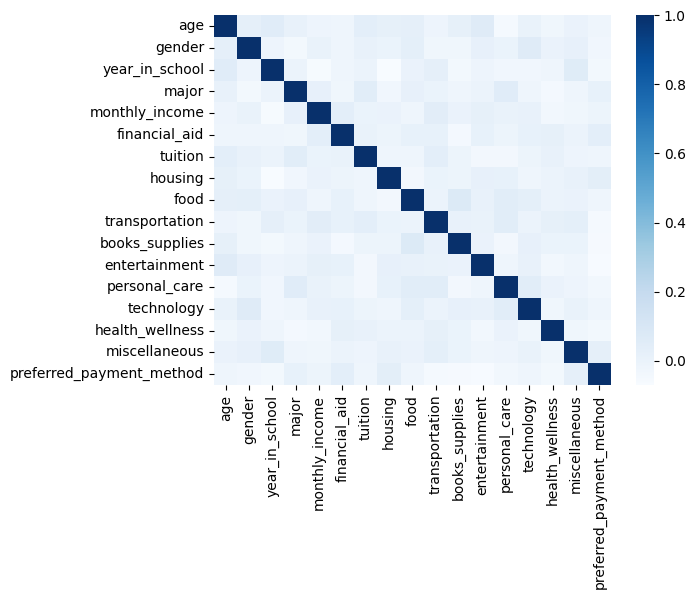

In [ ]:
sns.heatmap(corr_matrix,fmt="d",cmap="Blues")
plt.show()

heatmap illustrating the correlations between different numerical columns in the student data, after encoding categorical columns into numerical values. This visualization helps in understanding the relationships between various features in the dataset.We can see that most of the relations are negatively correlated.